In [1]:
import numpy as np
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import folium
import geopy
from pandas.io.json import json_normalize
from geopy.geocoders import Nominatim

print('Libraries Imported')

Libraries Imported


### Clustering Venues in Mumbai based on Search Query

In [2]:
# Define Foursquare Credentials

CLIENT_ID = 'OECZ01BUCTDUDGR0YUA4VKHV1T4COOU5535O5OKPCJFEAU3F' # your Foursquare ID
CLIENT_SECRET = 'FETLWMYN0AT51PPEKTIYBFRENECKX1OBTUMNN5U2BHI3TH0K' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 150

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: OECZ01BUCTDUDGR0YUA4VKHV1T4COOU5535O5OKPCJFEAU3F
CLIENT_SECRET:FETLWMYN0AT51PPEKTIYBFRENECKX1OBTUMNN5U2BHI3TH0K


#### First get the Co-Ordinates of Mumbai

In [106]:
address = 'Mumbai'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)

latitude = location.latitude
longitude = location.longitude

print('The geograpical coordinate of Mumbai are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Mumbai are 18.9387711, 72.8353355.


In [3]:
latitude, longitude = 18.9387711, 72.8353355

#### Visualize Mumbai on a MAP

In [4]:
folium.Map(location = [latitude, longitude], zoom_start = 11)

#### Enter the Search Query to search for a particular venues

In [5]:
search_query = 'restaurant'
radius = 1500
print(search_query + ' .... OK!')

restaurant .... OK!


In [6]:
# Define url with parameters
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=OECZ01BUCTDUDGR0YUA4VKHV1T4COOU5535O5OKPCJFEAU3F&client_secret=FETLWMYN0AT51PPEKTIYBFRENECKX1OBTUMNN5U2BHI3TH0K&ll=18.9387711,72.8353355&v=20180605&query=restaurant&radius=1500&limit=150'

#### Get the response form the foursquare API

In [7]:
results = requests.get(url).json()
#results

In [8]:
results.keys()

dict_keys(['meta', 'response'])

The results returned has two keys and has all the relevant information in the <code>response</code> key.The details of all the venues returned by the FourSquare API are available in the <code>venues</code> keys, which is a list.

##### Let's have a look at the first venue

In [11]:
results['response']['venues'][0]

{'id': '5263f0f5498edc1ad5f3270f',
 'name': 'Nanumal Bhojraj Restaurant - Fort',
 'location': {'address': 'Near GPO, Fort, VT',
  'crossStreet': 'S. Bhagat Singh Road',
  'lat': 18.937974485877348,
  'lng': 72.83766325414364,
  'labeledLatLngs': [{'label': 'display',
    'lat': 18.937974485877348,
    'lng': 72.83766325414364}],
  'distance': 260,
  'postalCode': '400001',
  'cc': 'IN',
  'city': 'Mumbai',
  'state': 'Mahārāshtra',
  'country': 'India',
  'formattedAddress': ['Near GPO, Fort, VT (S. Bhagat Singh Road)',
   'Mumbai 400001',
   'Mahārāshtra',
   'India']},
 'categories': [{'id': '4bf58dd8d48988d10f941735',
   'name': 'Indian Restaurant',
   'pluralName': 'Indian Restaurants',
   'shortName': 'Indian',
   'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_',
    'suffix': '.png'},
   'primary': True}],
 'referralId': 'v-1604807989',
 'hasPerk': False}

#### Convert the response returned into a data frame for model development

We can Convert the results in to a dataframe using json_normalize() function

In [12]:
venues_df = json_normalize(results['response']['venues'])
venues_df.head()

,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress
0,5263f0f5498edc1ad5f3270f,Nanumal Bhojraj Restaurant - Fort,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",v-1604807989,False,"Near GPO, Fort, VT",S. Bhagat Singh Road,18.937974,72.837663,"[{'label': 'display', 'lat': 18.93797448587734...",260,400001,IN,Mumbai,Mahārāshtra,India,"[Near GPO, Fort, VT (S. Bhagat Singh Road), Mu..."
1,4e4c0a4122713bd908c641ff,Farhang Restaurant,"[{'id': '4bf58dd8d48988d1cc941735', 'name': 'S...",v-1604807989,False,Opposite GPO,Ballard Estate,18.938165,72.837917,"[{'label': 'display', 'lat': 18.93816453050136...",280,NaN,IN,Mumbai,Mahārāshtra,India,"[Opposite GPO (Ballard Estate), Mumbai, Mahārā..."
2,4fb5276be4b0b34b9ac27a1b,Iran Like Restaurant,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",v-1604807989,False,"Palton Road, Near Haj House",NaN,18.945343,72.836809,"[{'label': 'display', 'lat': 18.94534293649397...",747,400001,IN,Mumbai,Mahārāshtra,India,"[Palton Road, Near Haj House, Mumbai 400001, M..."
3,4d9f2bfe9b91a1cda6c365c0,New Majestic Restaurant,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",v-1604807989,False,Opp CST,NaN,18.938972,72.835517,"[{'label': 'display', 'lat': 18.93897156089674...",29,NaN,IN,Mumbai,Mahārāshtra,India,"[Opp CST, Mumbai, Mahārāshtra, India]"
4,4c09449eed2595217aee1256,Stadium Restaurant & Stores,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",v-1604807989,False,Veer Nariman Road,"Next to Vodafone Store, Churchgate",18.933173,72.826929,"[{'label': 'display', 'lat': 18.93317339191467...",1082,400023,IN,Mumbai,Mahārāshtra,India,"[Veer Nariman Road (Next to Vodafone Store, Ch..."


In [13]:
# Let us look at the number of venues returned
venues_df.shape

(50, 17)

#### Cleaning the dataframe and retrieving only the relevant information from it

The categories columns has a lots of metadata, but we are only interested in the categories name.

Not all rows has a category, we return <code>NaN</code> for empty categories and name otherwise

##### Let's define a function to extract the categories from each entry.

In [14]:
def get_category(row):
    try:
        return row[0]['name']
    except:
        # return nan for no category
        return np.NaN

In [15]:
# Arrange the dataframe 
venues_df = venues_df[['name', 'categories', 'location.address', 'location.lat', 'location.lng', 'location.distance', 'id']]

# Get the cateogories of each venue
venues_df['categories'] = venues_df['categories'].apply(get_category)

# Rename the columns to be relevant with the entries
venues_df.columns = ['Name', 'Categories', 'Address', 'Latitude', 'Longitude', 'Distance', 'Id']

# Replace the NaN Categories with the highest occurence of the category, ie. 'Indian Restaurant'  
venues_df['Categories'].fillna('Indian Restaurant', inplace = True)

venues_df.head()

,Name,Categories,Address,Latitude,Longitude,Distance,Id
0,Nanumal Bhojraj Restaurant - Fort,Indian Restaurant,"Near GPO, Fort, VT",18.937974,72.837663,260,5263f0f5498edc1ad5f3270f
1,Farhang Restaurant,Steakhouse,Opposite GPO,18.938165,72.837917,280,4e4c0a4122713bd908c641ff
2,Iran Like Restaurant,Indian Restaurant,"Palton Road, Near Haj House",18.945343,72.836809,747,4fb5276be4b0b34b9ac27a1b
3,New Majestic Restaurant,Indian Restaurant,Opp CST,18.938972,72.835517,29,4d9f2bfe9b91a1cda6c365c0
4,Stadium Restaurant & Stores,Indian Restaurant,Veer Nariman Road,18.933173,72.826929,1082,4c09449eed2595217aee1256


In [16]:
# Explore venues from each category
venues_df['Categories'].value_counts()

Indian Restaurant                  22
Restaurant                          4
Asian Restaurant                    4
Snack Place                         2
Bar                                 2
Southern / Soul Food Restaurant     1
Seafood Restaurant                  1
Steakhouse                          1
BBQ Joint                           1
English Restaurant                  1
Gastropub                           1
Cantonese Restaurant                1
Mughlai Restaurant                  1
Vegetarian / Vegan Restaurant       1
Punjabi Restaurant                  1
Lounge                              1
Afghan Restaurant                   1
Food                                1
Fast Food Restaurant                1
Hotel Bar                           1
Irani Cafe                          1
Name: Categories, dtype: int64

#### Visualize the nearby venues on a MAP

In [18]:
# Display the mumbai map
mumbai_map = folium.Map(location = [latitude, longitude], zoom_start = 15)

# Display start location using a red marker
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Your Loc',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(mumbai_map)

# Display Venues
for lat, lng in zip(venues_df.Latitude, venues_df.Longitude):
    folium.CircleMarker(
        [lat, lng],
        radius = 5,
        color = 'yellow',
        fill = True,
        fill_color = 'blue',
        fill_opacity = 0.6
    ).add_to(mumbai_map)
    
# Display popup text for each venue
for lat, lng, label in zip(venues_df.Latitude, venues_df.Longitude, venues_df.Name):
    folium.Marker(
        [lat, lng],
        popup = label
    ).add_to(mumbai_map)


mumbai_map

### Exploring all the Venues around the given co-ordinates 

#### Let us define a function to return all the venues located nearby these venues

In [19]:
def getNearbyVenues(names, latitudes, longitudes, radius = 500, limit = 100):
    # venues space to store all the details
    venues_list = []
    
    # Iterate through different lat, lng
    for name, lat, lng in zip(names, latitudes, longitudes):
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)
        
        # Get the result
        venues = requests.get(url).json()['response']['groups'][0]['items']
        
        # Add the results to the venues_list
        for venue in venues:
            venues_list.append([(
                name, 
                lat, 
                lng,
                venue['venue']['name'],
                venue['venue']['categories'][0]['name'],
                venue['venue']['location']['lat'],
                venue['venue']['location']['lng']
            )])
    
    nearby_venues_df = pd.DataFrame(venues_list)
    
    return(nearby_venues_df)

In [20]:
# Get all the venues
mumbai_venues = getNearbyVenues(
    names = venues_df['Name'],
    latitudes = venues_df['Latitude'],
    longitudes = venues_df['Longitude']
)

#### Cleaning the dataframe and retrieving only the relevant information from it

The dataframe returned is not clean, lets filter the columns to return all the relevant information from it. Each row in the dataframe is a tuple of the form <br>
<code>(venue name, venue latitude, venue longitude, Neighbourhood Name, Neighbourhood Category, Neighbourhood latitude, Neighbourhood longitude)</code>

In [21]:
mumbai_venues['Venue'] = mumbai_venues.apply(lambda x: x[0][0], axis = 1)
mumbai_venues['Venue Latitude'] = mumbai_venues.apply(lambda x: x[0][1], axis = 1)
mumbai_venues['Venue Longitude'] = mumbai_venues.apply(lambda x: x[0][2], axis = 1)
mumbai_venues['Neighbourhood Name'] = mumbai_venues.apply(lambda x: x[0][3], axis = 1)
mumbai_venues['Neighbourhood Category'] = mumbai_venues.apply(lambda x: x[0][4], axis = 1)
mumbai_venues['Neighbourhood Latitude'] = mumbai_venues.apply(lambda x: x[0][5], axis = 1)
mumbai_venues['Neighbourhood Longitude'] = mumbai_venues.apply(lambda x: x[0][6], axis = 1)

# lets drop the first column containing a tuple
mumbai_venues.drop(0, axis = 1, inplace = True)

In [22]:
mumbai_venues.head()

,Venue,Venue Latitude,Venue Longitude,Neighbourhood Name,Neighbourhood Category,Neighbourhood Latitude,Neighbourhood Longitude
0,Nanumal Bhojraj Restaurant - Fort,18.937974,72.837663,Sher-E-Punjab,Indian Restaurant,18.937944,72.837853
1,Nanumal Bhojraj Restaurant - Fort,18.937974,72.837663,Dakshin Bar And Kitchen,Seafood Restaurant,18.936489,72.837490
2,Nanumal Bhojraj Restaurant - Fort,18.937974,72.837663,Café Universal,Irani Cafe,18.936021,72.837453
3,Nanumal Bhojraj Restaurant - Fort,18.937974,72.837663,Britannia & Co.,Parsi Restaurant,18.934683,72.840183
4,Nanumal Bhojraj Restaurant - Fort,18.937974,72.837663,Town House Cafe,Bar,18.938550,72.833464


In [23]:
# Let us look at the total neighbourhood returned
mumbai_venues.shape

(1618, 7)

##### Group each neighbourhood by Venues, this will give the total number of Neighbourhood for each Venues

In [24]:
mumbai_venues.groupby('Venue').count().head()

,Venue Latitude,Venue Longitude,Neighbourhood Name,Neighbourhood Category,Neighbourhood Latitude,Neighbourhood Longitude
Venue,,,,,,
Abhiruchi Restaurant,12,12,12,12,12,12
Amrapali Bar And Restaurant & Bar,78,78,78,78,78,78
Anubhav Restaurant & Bar,25,25,25,25,25,25
Aram Restaurant,14,14,14,14,14,14
Army restaurant,76,76,76,76,76,76


In [25]:
# Total Number of Unique Categories
print('There are total of {} unique categories'.format(len(mumbai_venues['Neighbourhood Category'].unique())))

There are total of 80 unique categories


### Analyze Each Neighbourhood

#### Create a new df with only the Neighbourhood numbers in it and all other Neighbourhood as 0

In [26]:
# create dummies for each venue 
mumbai_venues_onehot = pd.get_dummies(mumbai_venues[['Neighbourhood Category']], prefix = '', prefix_sep = '')

# Add venues column
mumbai_venues_onehot['Venue'] = mumbai_venues['Venue']

# Move the venues column to first index
mumbai_venues_onehot = mumbai_venues_onehot[[mumbai_venues_onehot.columns[-1]] + list(mumbai_venues_onehot.columns[:-1])]

mumbai_venues_onehot.head()

,Venue,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bank,Bar,...,Sandwich Place,Scenic Lookout,Seafood Restaurant,Smoke Shop,Steakhouse,Tea Room,Train Station,Vegetarian / Vegan Restaurant,Wine Shop,Women's Store
0,Nanumal Bhojraj Restaurant - Fort,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Nanumal Bhojraj Restaurant - Fort,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,Nanumal Bhojraj Restaurant - Fort,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Nanumal Bhojraj Restaurant - Fort,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Nanumal Bhojraj Restaurant - Fort,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [27]:
mumbai_grpd = mumbai_venues_onehot.groupby('Venue').mean().reset_index()

mumbai_grpd.head()

,Venue,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bank,Bar,...,Sandwich Place,Scenic Lookout,Seafood Restaurant,Smoke Shop,Steakhouse,Tea Room,Train Station,Vegetarian / Vegan Restaurant,Wine Shop,Women's Store
0,Abhiruchi Restaurant,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000
1,Amrapali Bar And Restaurant & Bar,0.000000,0.025641,0.012821,0.012821,0.000000,0.012821,0.012821,0.000000,0.012821,...,0.000000,0.0,0.038462,0.012821,0.012821,0.012821,0.000000,0.025641,0.000000,0.012821
2,Anubhav Restaurant & Bar,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,...,0.000000,0.0,0.080000,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000
3,Aram Restaurant,0.000000,0.000000,0.000000,0.000000,0.071429,0.000000,0.000000,0.000000,0.142857,...,0.071429,0.0,0.071429,0.000000,0.000000,0.000000,0.071429,0.000000,0.000000,0.000000
4,Army restaurant,0.000000,0.000000,0.013158,0.013158,0.000000,0.000000,0.026316,0.013158,0.013158,...,0.013158,0.0,0.026316,0.013158,0.013158,0.013158,0.013158,0.026316,0.000000,0.000000


### Cluster Neighbourhoods

In [28]:
# Import the libraries

from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

#### Choosing the Best Number of Cluster

##### The right number of cluster is neccessary to build a clustering model, we will use the elbow method to determine the within cluster sum of square using the inertia parameter of the KMeans algorithm

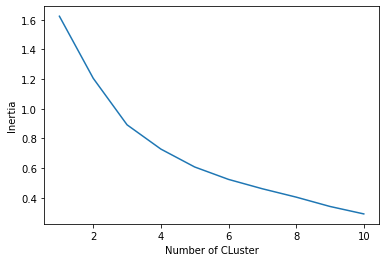

In [29]:
# List to store all the inertia values
wcss = []

# Iterate through all the number of clusters
for i in range(1, 11):

    # Initialize the KMeans with these parameters 
    kmeans_i = KMeans(init = 'k-means++', n_clusters = i, random_state = 0)
    
    # Fit the model
    kmeans_i.fit(mumbai_grpd.drop('Venue', axis = 1))
    
    # Get the inertia and add it to the list
    wcss.append(kmeans_i.inertia_)

# Plot the wcss with their respective number of clusters 
plt.plot(range(1, 11), wcss)

# Name the axes
plt.xlabel('Number of CLuster')
plt.ylabel('Inertia')

# visualize
plt.show()

In [30]:
# Let us look at the within cluster sum of squares
wcss

[1.6231069924094814,
 1.2051159177328645,
 0.8917592561341209,
 0.72824905263405,
 0.6076479810953374,
 0.5240323205180242,
 0.4609730474331194,
 0.40467261450536696,
 0.3417493657728904,
 0.29150606406727797]

#### Clearly from the elbow method <code>number of clusters</code> should be <code>5</code>, as from the graph increasing the number of cluster further will not decrease the wcss much which can be interpreted from the list

### Clustering Using 5 clusters

In [31]:
# define the number of custers
klstr = 5

# Initialize the KMeans with these parameters
kmeans = KMeans(n_clusters = klstr, random_state = 0, init = 'k-means++')

# Fit the model
kmeans.fit(mumbai_grpd.drop('Venue', axis = 1))

KMeans(n_clusters=5, random_state=0)

In [33]:
# Get the labels and the intertia
print("Cluster Labels: ", kmeans.labels_)
print("Within cluster summ of sqaures: ", kmeans.inertia_)

Cluster Labels:  [3 0 2 2 0 0 2 0 2 3 0 2 2 0 2 2 0 3 2 0 2 1 1 0 1 1 2 1 0 2 0 2 2 0 1 2 3
 2 2 4 4 1 4 4 3 1 3 4 1 1]
Within cluster summ of sqaures:  0.6076479810953374


### Create a new dataframe with venues and add the labels to the dataframe

In [35]:
# Add the lable to the df
mumbai_grpd.insert(1, 'Cluster Labels', kmeans.labels_)

# Extract the labels to form a new df
label_df = mumbai_grpd[['Venue', 'Cluster Labels']]

# Rename the columns
label_df.columns = ['Name', 'Cluster Labels']

label_df.head()

,Name,Cluster Labels
0,Abhiruchi Restaurant,3
1,Amrapali Bar And Restaurant & Bar,0
2,Anubhav Restaurant & Bar,2
3,Aram Restaurant,2
4,Army restaurant,0


## Add cluster labels to the original venues dataframe

In [39]:
# Merge the label and venues df on Name column
venues_df = pd.merge(venues_df, label_df, on = 'Name')
venues_df.head()

,Name,Categories,Address,Latitude,Longitude,Distance,Id,Cluster Labels
0,Nanumal Bhojraj Restaurant - Fort,Indian Restaurant,"Near GPO, Fort, VT",18.937974,72.837663,260,5263f0f5498edc1ad5f3270f,2
1,Farhang Restaurant,Steakhouse,Opposite GPO,18.938165,72.837917,280,4e4c0a4122713bd908c641ff,2
2,Iran Like Restaurant,Indian Restaurant,"Palton Road, Near Haj House",18.945343,72.836809,747,4fb5276be4b0b34b9ac27a1b,3
3,New Majestic Restaurant,Indian Restaurant,Opp CST,18.938972,72.835517,29,4d9f2bfe9b91a1cda6c365c0,2
4,Stadium Restaurant & Stores,Indian Restaurant,Veer Nariman Road,18.933173,72.826929,1082,4c09449eed2595217aee1256,4


## Visualize the Cluster

In [40]:
cluster_map = folium.Map(location = [latitude, longitude], zoom_start = 15)

x = np.arange(klstr)
ys = [i + x + (i*x)**2 for i in range(klstr)]

# colors space for the cluster
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))

# colors for the specific cluster
rainbow = [colors.rgb2hex(i) for i in colors_array]

# Add markers to the map
markers_colors = []
for lat, lng, hood, cluster in zip(venues_df['Latitude'], venues_df['Longitude'], venues_df['Name'], venues_df['Cluster Labels']):
    label = str(hood) + ', Cluster ' + str(cluster)
    folium.CircleMarker(
        [lat, lng],
        radius = 5,
        popup = label,
        color = rainbow[cluster - 1],
        fill = True,
        fill_color = 'yellow',
        fill_opacity = 0.7
    ).add_to(cluster_map)


cluster_map

#### Now we can segment the venues on the basis of the labels

#### Segment 1

In [49]:
print('Total: ', venues_df[venues_df['Cluster Labels'] == 0].shape[0])

venues_df[venues_df['Cluster Labels'] == 0]

Total:  12


,Name,Categories,Address,Latitude,Longitude,Distance,Id,Cluster Labels
8,Nanumal Bhojraj Restaurant - Masjid Bunder,Indian Restaurant,"Gaumukh Bhawan, Masjid Bunder West, Near Masji...",18.953200,72.837577,1623,5263f3ed11d233a4dfbfa5d0,0
19,Brighton Restaurant,Restaurant,NaN,18.935007,72.833687,453,4fe04a32e4b0214434085a1d,0
23,Fort restaurant,Indian Restaurant,Fort,18.933971,72.833605,564,4ccbd86354f0b1f7104212ca,0
24,India Restaurant,Indian Restaurant,"82, Janma Bhoomio Marg,",18.933360,72.831855,705,4cfc9729feec6dcb47414d36,0
26,Lalit restaurant,Bar,Cawasji Patel road,18.935002,72.833791,450,4cbd5908d8e9bfb748b8d6d2,0
27,New Udupi Restaurant,Fast Food Restaurant,NaN,18.933005,72.834305,650,51908c86498e89cb8b832c9d,0
30,Modern Restaurant and Bar,Restaurant,Fort,18.933058,72.833440,666,4fa38ee4e4b0d905243e3b16,0
32,Dwarka restaurant,Indian Restaurant,Fort,18.932187,72.833336,762,4d4281ea946af04d488f0477,0
36,Bademiya The Kabab Restaurant,Mughlai Restaurant,Horniman Circle,18.931330,72.834983,829,54ca78a3498e9ab786013874,0
42,Army restaurant,Asian Restaurant,Kala ghoda,18.932583,72.830041,886,4fba17b1e4b05dd0d7063d58,0


#### Segment 2

In [50]:
print('Total: ', venues_df[venues_df['Cluster Labels'] == 1].shape[0])

venues_df[venues_df['Cluster Labels'] == 1]

Total:  10


,Name,Categories,Address,Latitude,Longitude,Distance,Id,Cluster Labels
5,Panchratna restaurant & bar,Indian Restaurant,Opp. Metro Cinema,18.942900,72.826820,1007,4f489f23e4b018635344413a,1
21,Welcome Restaurant,Indian Restaurant,NaN,18.942531,72.831328,594,4f8d364de4b037ca8449555d,1
28,Kit Kat - Bar & Restaurant,Bar,1sr Marine street,18.942578,72.828532,832,4cade9768b57a1cdb4df9b75,1
29,kamat restaurant,Vegetarian / Vegan Restaurant,NaN,18.941806,72.827485,892,533a6a0c498e5f891d2d5cde,1
33,edward restaurant,Snack Place,c h road,18.945301,72.829118,978,4cce3dc0c566199c5082c98c,1
34,Khuda-E Restaurant,Hotel Bar,NaN,18.945160,72.830874,852,50cdd967e4b000435cee267a,1
39,Mao Family Restaurant,Punjabi Restaurant,"534 / 536, Kalbadevi Road",18.943966,72.829435,848,54c89284498e717a375b5019,1
41,Liberty Restaurant,Indian Restaurant,"opposite Liberty Cinema, Jasville, 9, New Mari...",18.941539,72.827185,911,4e196b2aa8097d08b240a067,1
45,Lord Irwin Bar & Restaurant,English Restaurant,NaN,18.942060,72.826465,1003,584d3be84287c956a20ac0a7,1
49,Snowflake restaurant,Seafood Restaurant,NaN,18.943933,72.826486,1094,4f2fe9ace4b006ef9baa815e,1


#### Segment 3

In [51]:
print('Total: ', venues_df[venues_df['Cluster Labels'] == 2].shape[0])

venues_df[venues_df['Cluster Labels'] == 2]

Total:  17


,Name,Categories,Address,Latitude,Longitude,Distance,Id,Cluster Labels
0,Nanumal Bhojraj Restaurant - Fort,Indian Restaurant,"Near GPO, Fort, VT",18.937974,72.837663,260,5263f0f5498edc1ad5f3270f,2
1,Farhang Restaurant,Steakhouse,Opposite GPO,18.938165,72.837917,280,4e4c0a4122713bd908c641ff,2
3,New Majestic Restaurant,Indian Restaurant,Opp CST,18.938972,72.835517,29,4d9f2bfe9b91a1cda6c365c0,2
6,Sai Pooja Restaurant,Indian Restaurant,NaN,18.938357,72.835073,53,4e7c3bdf52b10564f7f6fd20,2
7,Poonam Restaurant,Restaurant,NaN,18.939225,72.835707,63,516b85f7498ee0be22ee065a,2
9,Aram Restaurant,Asian Restaurant,"Capitol building, DN Road",18.939543,72.834495,123,4f1e22ffe4b0fb1c9661f579,2
10,Kalpana restaurant,Indian Restaurant,Gpo,18.937489,72.836157,166,4e380d42149579ccbaf3993f,2
11,Gulshan Restaurant,Indian Restaurant,NaN,18.938199,72.837764,263,52e606d5498e5b4456258e37,2
12,Royal China Restaurant,Cantonese Restaurant,NaN,18.937876,72.831005,466,53faf614498ea66a49cfc4e4,2
13,Mangalore naaz Restaurant,Asian Restaurant,NaN,18.937245,72.837606,293,5278a75e11d2311d4b3b2e6e,2


#### Segment 4

In [52]:
print('Total: ', venues_df[venues_df['Cluster Labels'] == 3].shape[0])

venues_df[venues_df['Cluster Labels'] == 3]

Total:  6


,Name,Categories,Address,Latitude,Longitude,Distance,Id,Cluster Labels
2,Iran Like Restaurant,Indian Restaurant,"Palton Road, Near Haj House",18.945343,72.836809,747,4fb5276be4b0b34b9ac27a1b,3
35,Yadgar Iqbal Restaurant,Indian Restaurant,Mohammed Ali Road,18.946279,72.834836,837,4fb5282be4b087193afc1656,3
37,Civil Restaurant,Afghan Restaurant,Near Crawford Market,18.945857,72.833884,803,52f65ca9498e084083ee43db,3
38,Ustaadi Restaurant,Lounge,"B Block, Sitaram Building",18.945482,72.834270,755,59be9e8a3149b92b3cd3501e,3
40,Abhiruchi Restaurant,Asian Restaurant,Ramabai Ambedkar Marg,18.946803,72.835561,894,4dbbcfcdf7b1ab37dd4e2708,3
43,Radio Restaurant,Snack Place,NaN,18.947904,72.835886,1018,4e900e94b8f79f71de555687,3


#### Segment 5

In [53]:
print('Total: ', venues_df[venues_df['Cluster Labels'] == 4].shape[0])

venues_df[venues_df['Cluster Labels'] == 4]

Total:  5


,Name,Categories,Address,Latitude,Longitude,Distance,Id,Cluster Labels
4,Stadium Restaurant & Stores,Indian Restaurant,Veer Nariman Road,18.933173,72.826929,1082,4c09449eed2595217aee1256,4
22,balaji restaurant,Southern / Soul Food Restaurant,Ghatkopar,18.938389,72.830032,560,5232e59611d2134cfc06f830,4
31,Suruchi Restaurant,Indian Restaurant,Near Sunderbhai Hall,18.938188,72.828679,703,4bc8252d0050b713b2e9b93b,4
46,Secret Kitchen Of A Soon To Open Restaurant,Gastropub,NaN,18.934718,72.826450,1038,5274a92411d2aff2671779b3,4
48,ShivSagar Restaurant,Indian Restaurant,NaN,18.933030,72.827410,1051,51d44f43498ebc021ff13f64,4
